In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import cross_val_score

In [2]:
'''
Load CSV
'''
df = pd.read_csv("datasets/train_radiomics_hipocamp.csv")


'''
Inspecionar
'''

df.columns
display(df)

,ID,Image,Mask,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,006_S_0681,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,941_S_1203,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,011_S_0003,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,057_S_0779,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,033_S_0920,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,094_S_1241,/notebooks/disk2/DS2_FreeSurfer/ADNI_094_S_124...,/notebooks/disk2/DS2_FreeSurfer/ADNI_094_S_124...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.010593,270974.110643,438.460201,0.001615,0.170377,0.014580,0.001667,1,72.2,CN-CN
301,067_S_0177,/notebooks/disk2/DS2_FreeSurfer/ADNI_067_S_017...,/notebooks/disk2/DS2_FreeSurfer/ADNI_067_S_017...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.006170,350646.909722,434.517852,0.001757,0.195109,0.019239,0.001813,0,75.0,CN-CN
302,036_S_0748,/notebooks/disk2/DS2_FreeSurfer/ADNI_036_S_074...,/notebooks/disk2/DS2_FreeSurfer/ADNI_036_S_074...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.009848,290668.100995,311.365820,0.002103,0.137740,0.009686,0.002170,1,79.6,MCI-AD
303,053_S_0621,/notebooks/disk2/DS2_FreeSurfer/ADNI_053_S_062...,/notebooks/disk2/DS2_FreeSurfer/ADNI_053_S_062...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.014174,211613.548120,349.919451,0.001890,0.145615,0.010622,0.001936,0,62.4,MCI-MCI


In [3]:
'''
Colunas Inuteis
'''

# Identificar as colunas com o mesmo valor em todas as linhas
colunas_constantes = df.columns[df.nunique() == 1]

# Remover essas colunas do DataFrame
df = df.drop(columns=colunas_constantes)

In [4]:
'''
Limpar
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2022 entries, ID to Transition
dtypes: float64(1994), int64(19), object(9)
memory usage: 4.7+ MB


In [92]:
# Seleciona as colunas do tipo 'object' (geralmente texto ou categorias)
'''object_columns = df.select_dtypes(include='object')

display(object_columns)
'''

,ID,Image,Mask,diagnostics_Image-original_Hash,diagnostics_Mask-original_Hash,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_CenterOfMassIndex,Transition
0,006_S_0681,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,b5d774a32163a7ee822d42a07808a787f8687f56,315bdd7a06bb73df17bfc1297398b4398e36e180,"(103, 113, 93, 36, 30, 71)","(121.94230227976358, 129.27272727272728, 128.4...",CN-CN
1,941_S_1203,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,397042d736bd790b7880b372b1749ff424f89cbe,208a2b034b72592489315104ef526ca10d434f24,"(81, 127, 93, 47, 16, 73)","(107.06170458927883, 135.28088443244633, 128.2...",CN-CN
2,011_S_0003,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,84d679a88812c4aaf03a6d99f00c913b2f64506f,352220437f6381b051fd4173969519887b530df6,"(77, 119, 89, 49, 30, 81)","(103.3640972118682, 135.28164604144922, 128.98...",AD-AD
3,057_S_0779,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,168f330d2ca3f097146e5d041f33b40672d230df,9f62584e8badeb5de90b797d0c86c5170465d90f,"(93, 102, 90, 41, 29, 78)","(116.29827315541601, 118.67431469629271, 129.3...",CN-MCI
4,033_S_0920,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,ea5f291ea107dfda5e5c725eae7c0555ced44ce4,62ab23b0a4ea4c9e7574b1ea410bd90236fe1d6e,"(87, 119, 91, 40, 27, 75)","(108.26561977948546, 132.05462746408287, 127.6...",CN-CN
...,...,...,...,...,...,...,...,...
300,094_S_1241,/notebooks/disk2/DS2_FreeSurfer/ADNI_094_S_124...,/notebooks/disk2/DS2_FreeSurfer/ADNI_094_S_124...,378e450ae013e20e1fbf6e0b3ec9a27adcabb48d,3e1a290c9321e62e65b601c5a65e9869a39f65fb,"(88, 118, 89, 41, 25, 78)","(111.12904113358096, 132.1251891594442, 127.34...",CN-CN
301,067_S_0177,/notebooks/disk2/DS2_FreeSurfer/ADNI_067_S_017...,/notebooks/disk2/DS2_FreeSurfer/ADNI_067_S_017...,fcc41c968ebeb6980d175c41dbf6dd80befa801e,c44d678a3f9a861c2db2f543840fc635de465000,"(103, 103, 93, 38, 27, 70)","(123.63359040274207, 117.08414738646101, 128.8...",CN-CN
302,036_S_0748,/notebooks/disk2/DS2_FreeSurfer/ADNI_036_S_074...,/notebooks/disk2/DS2_FreeSurfer/ADNI_036_S_074...,8123ad6d9ff372737d94e146c7174e2f32b7b44a,9009b5a8b6b353bd243d9dc397c419102417cbde,"(80, 131, 89, 48, 17, 82)","(106.74250543084722, 141.1174511223751, 125.49...",MCI-AD
303,053_S_0621,/notebooks/disk2/DS2_FreeSurfer/ADNI_053_S_062...,/notebooks/disk2/DS2_FreeSurfer/ADNI_053_S_062...,cb03c6cd87f3c5eb6485b54d47a7cc8902db4598,35b753aa0bf5eabdf4dfd880b612de8369451e00,"(93, 103, 91, 40, 31, 75)","(115.08339067015274, 119.78656942342094, 127.4...",MCI-MCI


In [89]:
'''# Verificar o comprimento de cada tupla na coluna 'diagnostics_Mask-original_CenterOfMass'
lengths = df['diagnostics_Mask-original_CenterOfMass'].apply(lambda x: len(eval(x)) if isinstance(x, str) else len(x))

# Verifique os comprimentos para ter certeza de que todas as tuplas têm o mesmo tamanho
print(lengths.value_counts())

# Se todas as tuplas tiverem o mesmo tamanho, usamos esse valor para dividir as tuplas corretamente
tuple_length = lengths.mode()[0]  # Pega o tamanho mais frequente das tuplas

# Dividir as tuplas em várias colunas, baseado no tamanho encontrado
column_names = [f'CenterOfMass_{i+1}' for i in range(tuple_length)]
df[column_names] = pd.DataFrame(df['diagnostics_Mask-original_CenterOfMass'].apply(lambda x: eval(x) if isinstance(x, str) else x).to_list(), index=df.index)

# Excluir a coluna original depois de separar as tuplas
df = df.drop(columns=['diagnostics_Mask-original_CenterOfMass'])

# Verifique se as mudanças funcionaram
print(df.head())
'''

diagnostics_Mask-original_CenterOfMass
3    305
Name: count, dtype: int64
           ID                                              Image  \
0  006_S_0681  /notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...   
1  941_S_1203  /notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...   
2  011_S_0003  /notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...   
3  057_S_0779  /notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...   
4  033_S_0920  /notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...   

                                                Mask  \
0  /notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...   
1  /notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...   
2  /notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...   
3  /notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...   
4  /notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...   

            diagnostics_Image-original_Hash  diagnostics_Image-original_Mean  \
0  b5d774a32163a7ee822d42a07808a787f8687f56                         5.848123   
1  397042d736bd790b7

In [93]:
'''# Remover as colunas desnecessárias
df = df.drop(columns=['Image', 'Mask', 'diagnostics_Image-original_Hash', 
                      'diagnostics_Mask-original_Hash', 
                      'diagnostics_Mask-original_BoundingBox'])

# Transformar a coluna 'Transition' para 'category' para otimizar
df['Transition'] = df['Transition'].astype('category')

# Verificar o resultado
display(df)
'''

,ID,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_CenterOfMassIndex,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,...,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition,CenterOfMass_1,CenterOfMass_2,CenterOfMass_3
0,006_S_0681,5.848123,178,7106,"(121.94230227976358, 129.27272727272728, 128.4...",0.420040,0.106547,10.757474,100.964915,72.034714,...,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN,121.942302,129.272727,128.404025
1,941_S_1203,5.238834,190,7779,"(107.06170458927883, 135.28088443244633, 128.2...",0.425482,0.102532,10.432362,101.747321,73.246160,...,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN,107.061705,135.280884,128.274585
2,011_S_0003,6.816667,155,6707,"(103.3640972118682, 135.28164604144922, 128.98...",0.447685,0.135582,14.370911,105.993915,79.762146,...,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD,103.364097,135.281646,128.986283
3,057_S_0779,6.445162,171,8281,"(116.29827315541601, 118.67431469629271, 129.3...",0.418896,0.099626,10.639815,106.797600,78.102497,...,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI,116.298273,118.674315,129.309866
4,033_S_0920,5.568269,150,5986,"(108.26561977948546, 132.05462746408287, 127.6...",0.411851,0.080719,8.885188,110.075144,75.432089,...,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN,108.265620,132.054627,127.672068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,094_S_1241,6.268191,203,7269,"(111.12904113358096, 132.1251891594442, 127.34...",0.401673,0.101371,10.835627,106.890712,77.414469,...,0.001615,0.170377,0.014580,0.001667,1,72.2,CN-CN,111.129041,132.125189,127.346678
301,067_S_0177,4.846839,181,5835,"(123.63359040274207, 117.08414738646101, 128.8...",0.445362,0.090595,8.986151,99.189845,70.349129,...,0.001757,0.195109,0.019239,0.001813,0,75.0,CN-CN,123.633590,117.084147,128.842331
302,036_S_0748,6.562003,164,6905,"(106.74250543084722, 141.1174511223751, 125.49...",0.437854,0.106585,11.254700,105.593223,80.305666,...,0.002103,0.137740,0.009686,0.002170,1,79.6,MCI-AD,106.742505,141.117451,125.490514
303,053_S_0621,7.583210,135,7267,"(115.08339067015274, 119.78656942342094, 127.4...",0.463489,0.095407,9.694175,101.608857,74.168727,...,0.001890,0.145615,0.010622,0.001936,0,62.4,MCI-MCI,115.083391,119.786569,127.498968


In [7]:
'''
Decision Tree Classifier
'''
X = df.drop(['Transition'], axis=1)  #input
y = df['Transition'].to_frame()      #target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

In [9]:
clf = DecisionTreeClassifier(random_state=2021)

In [10]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [11]:
predictions = clf.predict(X_test)
predictions

array(['MCI-AD', 'AD-AD', 'MCI-AD', 'CN-CN', 'MCI-AD', 'MCI-MCI', 'AD-AD',
       'CN-MCI', 'MCI-AD', 'AD-AD', 'AD-AD', 'AD-AD', 'AD-AD', 'MCI-AD',
       'CN-CN', 'MCI-MCI', 'MCI-MCI', 'CN-CN', 'CN-CN', 'CN-CN', 'AD-AD',
       'MCI-AD', 'MCI-AD', 'MCI-AD', 'AD-AD', 'CN-CN', 'MCI-MCI',
       'MCI-AD', 'CN-CN', 'AD-AD', 'CN-CN', 'CN-CN', 'MCI-MCI', 'CN-CN',
       'CN-CN', 'AD-AD', 'CN-CN', 'CN-CN', 'MCI-AD', 'MCI-MCI', 'MCI-AD',
       'AD-AD', 'AD-AD', 'CN-CN', 'CN-CN', 'MCI-MCI', 'CN-CN', 'CN-CN',
       'CN-CN', 'MCI-AD', 'CN-CN', 'MCI-AD', 'MCI-MCI', 'AD-AD', 'MCI-AD',
       'AD-AD', 'AD-AD', 'MCI-MCI', 'MCI-AD', 'AD-AD', 'AD-AD', 'CN-CN',
       'CN-CN', 'MCI-MCI', 'CN-CN', 'MCI-MCI', 'MCI-MCI', 'AD-AD',
       'AD-AD', 'CN-CN', 'AD-AD', 'MCI-AD', 'CN-CN', 'MCI-MCI', 'AD-AD',
       'CN-CN', 'MCI-MCI'], dtype=object)

In [12]:
print(y_test.values.shape)

(77, 1)


In [13]:
'''
Data Exploration
'''

df.shape

(305, 2162)

In [14]:
df.dtypes

diagnostics_Image-original_Dimensionality      int64
diagnostics_Image-original_Mean              float64
diagnostics_Image-original_Minimum             int64
diagnostics_Image-original_Maximum             int64
diagnostics_Mask-original_VoxelNum             int64
                                              ...   
lbp-3D-k_ngtdm_Contrast                      float64
lbp-3D-k_ngtdm_Strength                      float64
Sex                                            int64
Age                                          float64
Transition                                    object
Length: 2162, dtype: object

In [15]:
df.describe()

,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,...,lbp-3D-k_glszm_ZoneEntropy,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age
count,305.0,305.000000,305.0,305.000000,305.000000,305.0,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,3.0,5.810469,0.0,173.504918,6714.790164,2.0,0.411819,0.096916,10.137707,104.883349,...,2.681657,0.010477,266015.006289,362.064990,0.002024,0.155767,0.012415,0.002091,0.567213,75.171148
std,0.0,0.613858,0.0,24.108871,1066.815670,0.0,0.028993,0.009739,0.911329,6.180335,...,0.259507,0.002009,59267.210682,102.133366,0.000531,0.024285,0.003814,0.000552,0.496276,6.675866
min,3.0,4.321602,0.0,128.000000,3609.000000,2.0,0.330890,0.075142,8.420713,90.675836,...,1.984788,0.005818,138177.996378,130.618182,0.001137,0.071124,0.002565,0.001168,0.000000,55.300000
25%,3.0,5.317298,0.0,157.000000,5941.000000,2.0,0.392944,0.089977,9.525253,100.501871,...,2.507947,0.009060,225781.559367,285.617369,0.001632,0.140791,0.009751,0.001688,0.000000,71.300000
50%,3.0,5.811449,0.0,172.000000,6723.000000,2.0,0.412479,0.096609,10.106838,104.370667,...,2.688709,0.010580,259226.493061,353.841144,0.001934,0.156580,0.012297,0.001995,1.000000,75.000000
75%,3.0,6.237751,0.0,190.000000,7396.000000,2.0,0.431621,0.102240,10.635093,108.677326,...,2.844025,0.011706,298836.166667,431.288497,0.002305,0.173700,0.015166,0.002373,1.000000,79.900000
max,3.0,7.583210,0.0,255.000000,9453.000000,2.0,0.491496,0.144082,14.370911,126.209296,...,3.494062,0.017015,465865.829238,670.406531,0.004325,0.223273,0.024548,0.004417,1.000000,91.000000


In [16]:
'''
Verificar nulos
'''
print(df.isna().sum())

diagnostics_Image-original_Dimensionality    0
diagnostics_Image-original_Mean              0
diagnostics_Image-original_Minimum           0
diagnostics_Image-original_Maximum           0
diagnostics_Mask-original_VoxelNum           0
                                            ..
lbp-3D-k_ngtdm_Contrast                      0
lbp-3D-k_ngtdm_Strength                      0
Sex                                          0
Age                                          0
Transition                                   0
Length: 2162, dtype: int64


In [17]:
'''
Verificar duplicados
'''
print(df.duplicated().sum())
print(df.drop_duplicates(inplace=True))
print(df.info())

0
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2162 entries, diagnostics_Image-original_Dimensionality to Transition
dtypes: float64(2014), int64(147), object(1)
memory usage: 5.0+ MB
None


<Axes: >

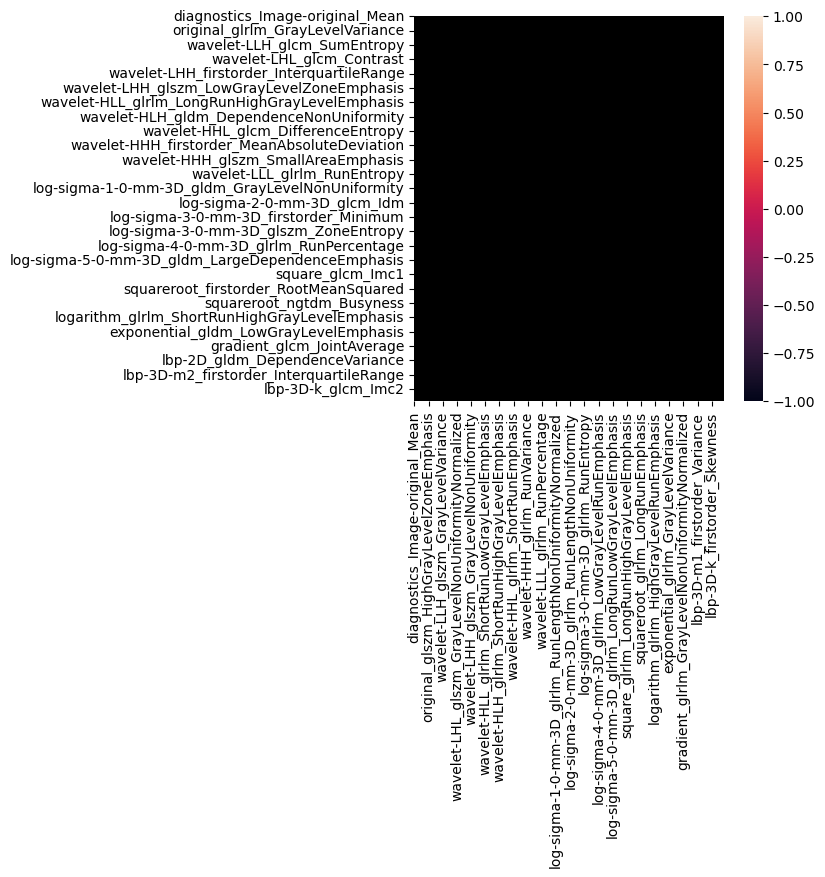

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra apenas as colunas numéricas do DataFrame
df_numeric = df.select_dtypes(include='number')

# Calcula a correlação entre as colunas numéricas
teste = df_numeric.corr(method='pearson')

# Plota o heatmap
fig = plt.figure(figsize=(5, 5))
sns.heatmap(teste, linecolor='black', linewidths=0.5)
